# Question 5

### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_7488/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Import data

In [11]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc").sel(time=slice('2002-01-01', '2016-07-01'))
ds

<xarray.Dataset>
Dimensions:           (time: 5145, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2016-07-0...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [12]:
# calculate the monthly cycle using groupby
monthly = ds.groupby(ds["time.month"]).max()
monthly.head()

<xarray.Dataset>
Dimensions:           (month: 5, lat: 5, lon: 5)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 33.24
  * lon               (lon) float32 -132.0 -131.9 -131.9 -131.8 -131.8
  * month             (month) int64 1 2 3 4 5
Data variables:
    analysed_sst      (month, lat, lon) float32 291.4 291.4 ... 292.6 292.6
    analysis_error    (month, lat, lon) float32 0.41 0.4 0.4 ... 0.41 0.41 0.41
    mask              (month, lat, lon) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    sea_ice_fraction  (month, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

### Calculate Anomaly

In [16]:
# calculate the anomaly
anomaly = monthly - ds.mean()
anomaly

<xarray.Dataset>
Dimensions:           (lat: 251, lon: 234, month: 12)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst      (month, lat, lon) float32 3.878 3.874 3.886 ... nan nan
    analysis_error    (month, lat, lon) float32 0.02822 0.01822 ... nan nan
    mask              (month, lat, lon) float32 -0.3569 -0.3569 ... 0.6431
    sea_ice_fraction  (month, lat, lon) float32 nan nan nan nan ... nan nan nan

### Group maximum values by month

In [14]:
# # calculate the annual cycle using groupby
# monthly = anomaly.groupby(anomaly["time.month"]).max()
# monthly.head()

### Plot Sea Surface Temperature

(array([  131.,  5598., 46326., 53543., 78847., 97708., 98256., 62757.,
        15384.,  1182.]),
 array([-8.88076782, -7.21336985, -5.54597187, -3.87857366, -2.21117544,
        -0.54377747,  1.12362063,  2.79101872,  4.45841694,  6.12581491,
         7.79321289]),
 <BarContainer object of 10 artists>)

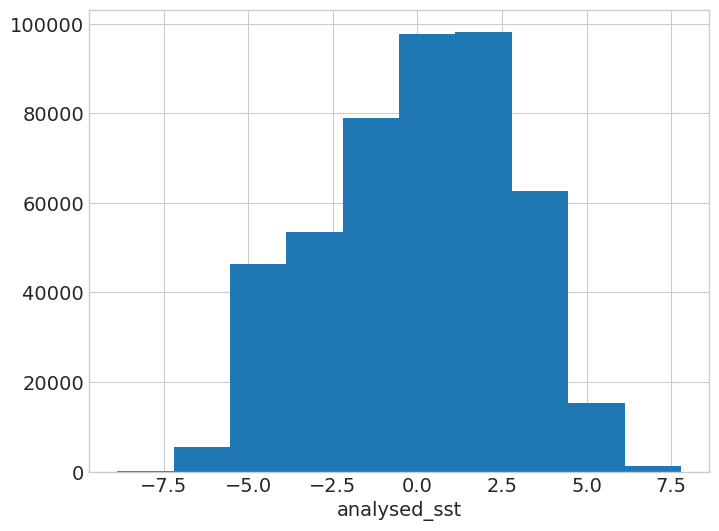

In [15]:
anomaly["analysed_sst"].plot()